In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"C:\Users\lenar\OneDrive\Documents\Data Bootcamp\Mod5Challenge\mod5_challenge\Mouse_metadata.csv"
study_results_path = r"C:\Users\lenar\OneDrive\Documents\Data Bootcamp\Mod5Challenge\mod5_challenge\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on= 'Mouse ID')

# Display the data 
print(merged_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [4]:
# Checking the number of mice.
total_mice = merged_data['Mouse ID'].nunique()
print(f'Total number of mice: {total_mice}')

Total number of mice: 249


In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

# Display data associated with mouse IDs having duplicate time points
print("Data associated with duplicate mouse IDs:")
print(merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)])

Data associated with duplicate mouse IDs:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propr

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)] #opposiste of isin

print("Clean data without duplicate timepoints:")
print(cleaned_data.head())

Clean data without duplicate timepoints:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned = cleaned_data['Mouse ID'].nunique()

print(f'Total number of mice in cleaned dataframe: {total_mice_cleaned}')

Total number of mice in cleaned dataframe: 248


Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
print(summary_statistics)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


Bar and Pie Charts

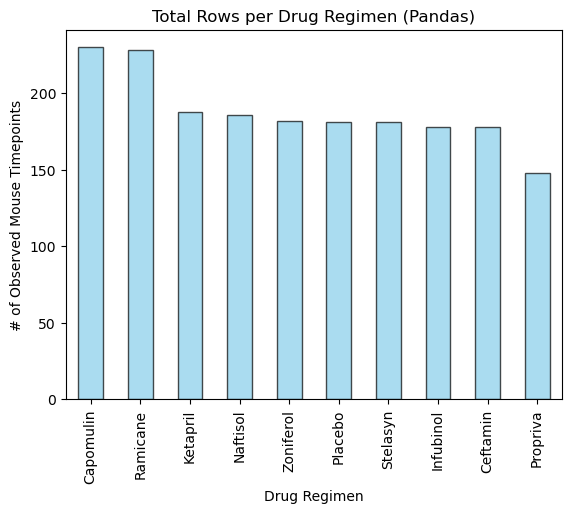

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot 
regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black', legend=False)

# Set plot labels and title
plt.title('Total Rows per Drug Regimen (Pandas)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()


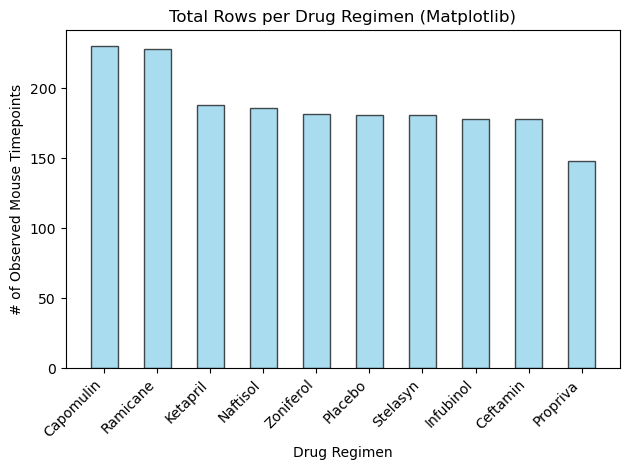

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Count the number of rows for each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Generate a bar plot using Matplotlib with spaced out bars
plt.bar(regimen_counts.index, regimen_counts, width=0.5, color='skyblue', alpha=0.7, edgecolor='black')

# Set plot labels and title
plt.title('Total Rows per Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()


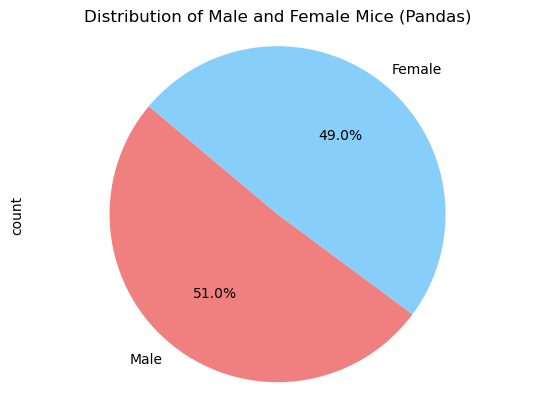

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


# Count the number of male and female mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Count the number of male and female mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Generate a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)

# Set plot title
plt.title('Distribution of Male and Female Mice (Pandas)')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


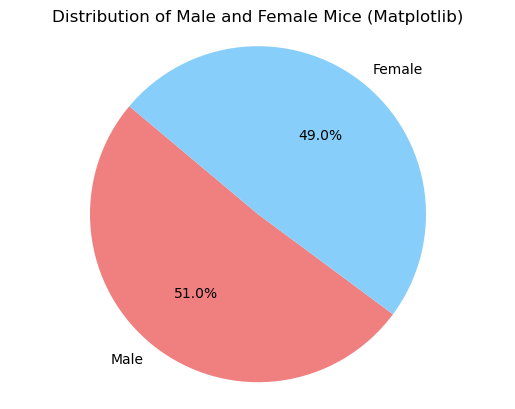

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Count the number of male and female mice
gender_distribution = cleaned_data['Sex'].value_counts()

# Generate a pie plot using Matplotlib
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)

# Set plot title
plt.title('Distribution of Male and Female Mice (Matplotlib)')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


Quartiles, Outliers, and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_timepoints = cleaned_data.groupby('Mouse ID')['Timepoint'].max()

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_df = pd.DataFrame(final_timepoints)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_final_data = pd.merge(final_tumor_volume_df, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_names = []

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Loop through each treatment
for treatment in treatments: 

    # Locate the rows corresponding to each treatment
    treatment_rows = merged_final_data.loc[merged_final_data['Drug Regimen'] == treatment]

    # Append treatment name to the list
    treatment_names.append(treatment)

    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volume_data.append(treatment_rows['Tumor Volume (mm3)'])

    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Determine outliers using upper and lower bounds
    quartiles = treatment_rows['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = treatment_rows[(treatment_rows['Tumor Volume (mm3)'] < lower_bound) | (treatment_rows['Tumor Volume (mm3)'] > upper_bound)]

    # Display results
    print(f"Potential outliers for {treatment}: {outliers['Tumor Volume (mm3)'].tolist()}\n")
    


Potential outliers for Capomulin: []

Potential outliers for Ramicane: []

Potential outliers for Infubinol: [36.3213458]

Potential outliers for Ceftamin: []



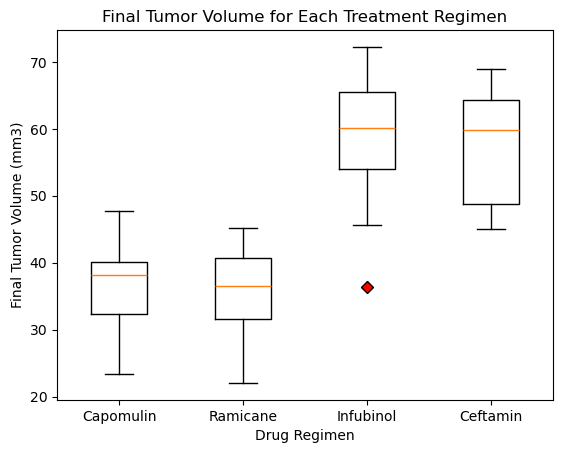

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

# Box plot for each treatment group
ax.boxplot(tumor_volume_data, labels=treatment_names, flierprops=dict(markerfacecolor='red', marker='D'))

# Set plot labels and title
ax.set_title('Final Tumor Volume for Each Treatment Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Display the plot
plt.show()


Line and Scatter Plots

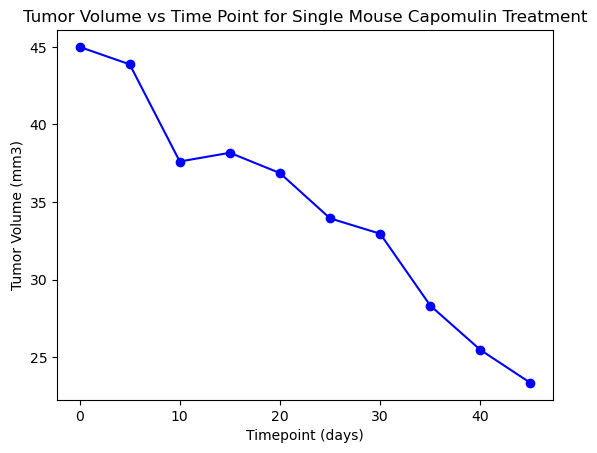

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']


# Choose a mouse from Capomulin treatment
selected_mouse = capomulin_data.loc[capomulin_data['Mouse ID'] == 's185']

# Generate a line plot of tumor value vs time point for the selected mouse
plt.plot(selected_mouse['Timepoint'], selected_mouse['Tumor Volume (mm3)'], marker='o', color='b')

# Set plot labels and title
plt.title('Tumor Volume vs Time Point for Single Mouse Capomulin Treatment')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()


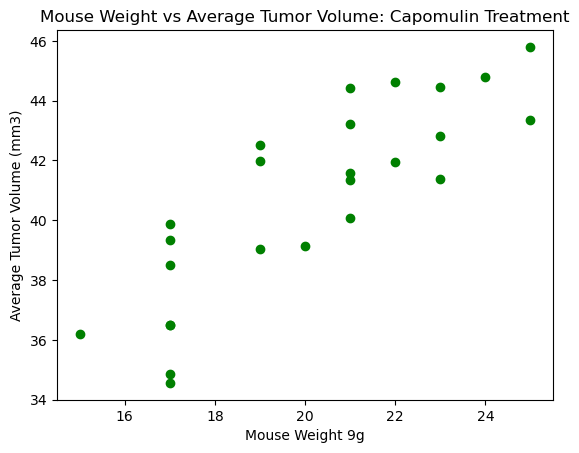

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Generate the scatter plot
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], color='green', marker='o')

# Set plot labels and title
plt.title('Mouse Weight vs Average Tumor Volume: Capomulin Treatment')
plt.xlabel('Mouse Weight 9g')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()


Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import the neccessary library for linear regression
from scipy.stats import linregress

# Group the capomulin data by mouse ID and calculate the mean weight and tumor volume for each mouse
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = capomulin_grouped['Weight (g)'].corr(capomulin_grouped['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

# Print the correlation coeffiencient
print(f'Correlation Coefficient: {correlation_coefficient}')

# Print the linear regression equation
print(f'Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}')


Correlation Coefficient: 0.8419363424694722
Linear Regression Model: y = 0.95x + 21.55


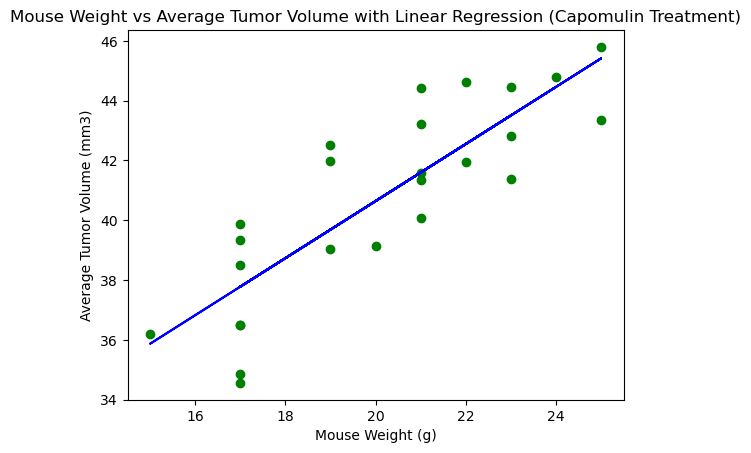

In [19]:
# Plot the linear regression model on the scatter plot

# Generate the scatter plot
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], color='green', marker='o')

# Plot the linear regression line
regression_line = slope * capomulin_grouped['Weight (g)'] + intercept
plt.plot(capomulin_grouped['Weight (g)'], regression_line, color='blue')

# Set plot labels and title
plt.title('Mouse Weight vs Average Tumor Volume with Linear Regression (Capomulin Treatment)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()
